## [Całkowanie](https://github.com/kzajac/Mownit2018/blob/master/Mownit_lab8.ipynb)


In [3]:
using Polynomials
using Plots
using QuadGK

### Zadanie 1.
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [2]:
function legendre(k)
    p = Poly([0,1])
    if k == 0
        Poly([1])
    elseif k == 1
        p
    else
        ((2*k-1)/k)*p*legendre(k-1) - ((k-1)/k)*legendre(k-2)
    end
end

legendre (generic function with 1 method)

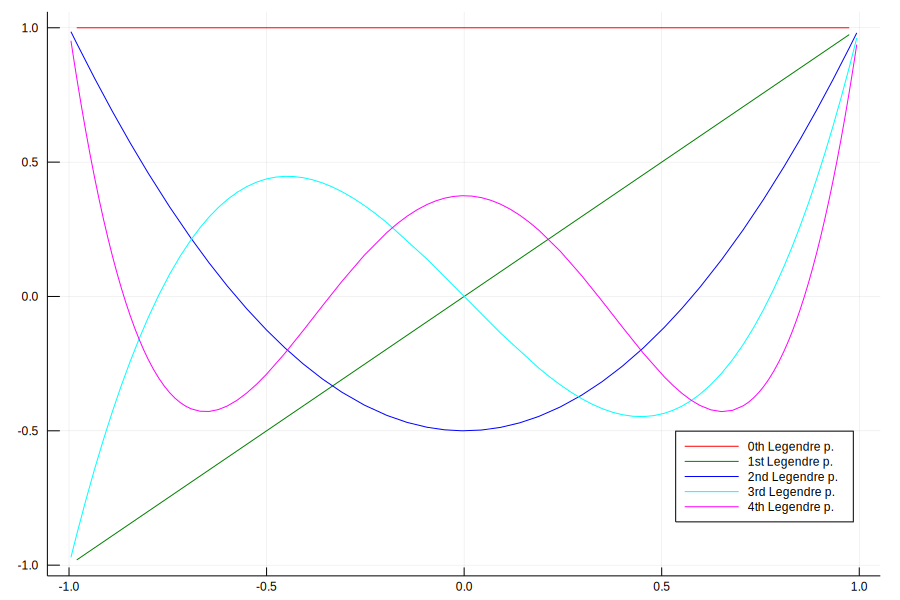

In [4]:
p0 = legendre(0)
p1 = legendre(1)
p2 = legendre(2)
p3 = legendre(3)
p4 = legendre(4)
plot( x -> p0(x), -1.0, 1.0 , color = :red, label = "0th Legendre p.", legend = :bottomright, size = (900,600))
plot!(x -> p1(x), -1.0, 1.0 , color = :green, label = "1st Legendre p.")
plot!(x -> p2(x), -1.0, 1.0 , color = :blue, label = "2nd Legendre p.")
plot!(x -> p3(x), -1.0, 1.0 , color = :cyan, label = "3rd Legendre p.")
plot!(x -> p4(x), -1.0, 1.0 , color = :magenta, label = "4th Legendre p.")

In [5]:
for k in 2:1:4
    for (i,j) in zip(sort(roots(legendre(k))),gauss(k)[1])
            println(i," ",j)
    end
    println()
end

-0.5773502691896258 -0.5773502691896258
0.5773502691896256 0.5773502691896258

-0.7745966692414834 -0.7745966692414834
0.0 0.0
0.7745966692414833 0.7745966692414834

-0.8611363115940536 -0.8611363115940526
-0.33998104358485653 -0.3399810435848563
0.3399810435848563 0.3399810435848563
0.8611363115940531 0.8611363115940526



__Twierdzenie:__ odcięte *x<sub>i</sub> n*-punktowej kwadratury Gaussa z funkcją ważącą *w(x)* w przedziale *I=[a, b]* są zerami wielomianu ortogonalnego *ϕ<sub>n</sub>(x)* dla przedziału *I* i funkcji ważącej *w(x)*.

### Zadanie 2.
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [26]:
function integrate(f, k)
    x, a = gauss(Float64,k)
    sum(a .* f.(x))  
end

integrate (generic function with 2 methods)

In [7]:
for i in 1:1:5
    println("For ",i,"-deg. quadrature")
    is_precise = true
    p = Poly([rand(),rand()])
    pdeg = 1
    
    while is_precise
        gauss_int = integrate(p, i)
        exact_int = polyint(p, -1.0, 1.0)
        println("\tFor ",pdeg,"-deg. polynomial")
        println("\t\tGauss result: ", gauss_int)
        println("\t\tExact result: ", exact_int)
        if abs(gauss_int - exact_int) > 1.0e-8
            is_precise = false
            p = Poly([rand(),rand()])
            pdeg = 1
            print("\033[31m")
        else
            p = p * Poly([rand(),rand()])  # p.degree++
            pdeg += 1
        end
        println("\t\tDifference  : ", abs(gauss_int - exact_int), "\033[0m")
    end
end

For 1-deg. quadrature
	For 1-deg. polynomial
		Gauss result: 0.2938026903844042
		Exact result: 0.2938026903844042
		Difference  : 0.0
	For 2-deg. polynomial
		Gauss result: 0.19164053644949675
		Exact result: 0.6169621970262162
		Difference  : 0.4253216605767195
For 2-deg. quadrature
	For 1-deg. polynomial
		Gauss result: 0.6222949879240905
		Exact result: 0.6222949879240907
		Difference  : 1.1102230246251565e-16
	For 2-deg. polynomial
		Gauss result: 0.5389942102433569
		Exact result: 0.5389942102433569
		Difference  : 0.0
	For 3-deg. polynomial
		Gauss result: 0.4853832637837015
		Exact result: 0.48538326378370145
		Difference  : 5.551115123125783e-17
	For 4-deg. polynomial
		Gauss result: 0.02386672076600442
		Exact result: 0.02437112299731121
		Difference  : 0.0005044022313067907
For 3-deg. quadrature
	For 1-deg. polynomial
		Gauss result: 1.0230539025798933
		Exact result: 1.0230539025798935
		Difference  : 2.220446049250313e-16
	For 2-deg. polynomial
		Gauss result: 0.4419501752

__Twierdzenie:__ Kwadratura stopnia *n* jest dokładna dla wielomianów do stopnia *2n-1*.

### Zadanie 3.
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji liczącej całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$  dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [27]:
function integrate(f, k, a, b)
    norm = x -> f((a + b)/2.0 + x * ((b - a)/2.0))
    return ((b - a)/2.0) * integrate(norm, k)
end

integrate (generic function with 2 methods)

In [28]:
println("For 2-deg. polynomial:")
p = Poly([1, 2, 3]) # 3x^2 + 2x + 1
println("\tExact result: ", 10^3 + 10^2 + 10)
println("\tGauss result: ",integrate(p,2,0,10))
println("For 6-deg. polynomial:")
p = Poly([rand(), rand(), rand(), rand(), rand(), rand(), 1])
println("\tExact result: ",polyint(p,0,10))
println("\tGauss result: ",integrate(p,4,0,10))
println("For sine function:")
println("\tExact result: ",sin(10)-sin(0))
println("\tGauss result: ",integrate(cos,8,0,10)) # im więcej punktów Gaussa tym lepiej

For 2-deg. polynomial:
	Exact result: 1110
	Gauss result: 1109.9999999999998
For 6-deg. polynomial:
	Exact result: 1.4459816895100113e6
	Gauss result: 1.4459816895100123e6
For sine function:
	Exact result: -0.5440211108893698
	Gauss result: -0.5440214504419013


### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

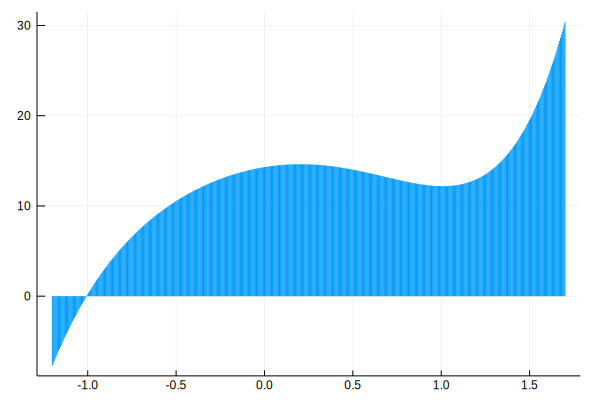

In [11]:
p = Poly([14.3, 3.2, -8.1, 0.6, 0.0, 2.19])
a = -1.2
b = 1.7
xs = -1.2:0.005:1.7
sticks(xs, p(xs), legend=:none)

In [12]:
println("Exact result : ", polyint(p, a, b))
println("QuadGK result: ", quadgk(p, a, b)[1])

Exact result : 34.521403525000004
QuadGK result: 34.521403525000004


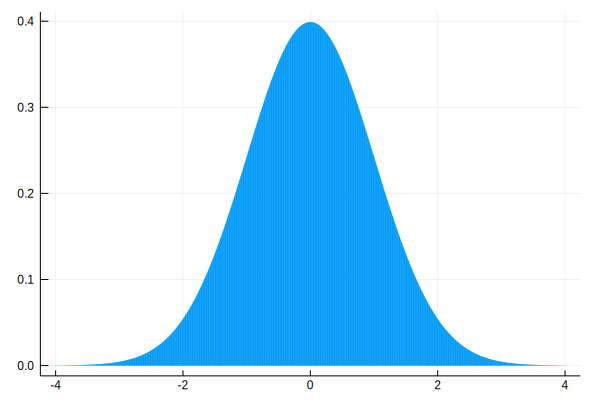

In [13]:
gaussian = x -> (1 / (sqrt(2*pi))) * exp(-(x^2)/2.0)
xs = -4.0:0.01:4.0
ys = [gaussian(x) for x in xs]
sticks(xs, ys, legend=:none)

In [14]:
# Całka rozkładu powinna być równa 1
quadgk(gaussian, -Inf, Inf)[1]

1.0000000000032583

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

In [6]:
function midpoint(f, a, b, n)
    h = (b - a)/n
    x = a+(h/2):h:b-(h/2)
    sum([h*f(xn) for xn in x])
end

midpoint (generic function with 1 method)

In [7]:
p = Poly([0,-1,1])
a = 0
b = 5
println("Midpoint result: ",midpoint(p, a, b, 25))
println("Exact result:    ",polyint(p, a, b))

Midpoint result: 29.150000000000006
Exact result:    29.16666666666666


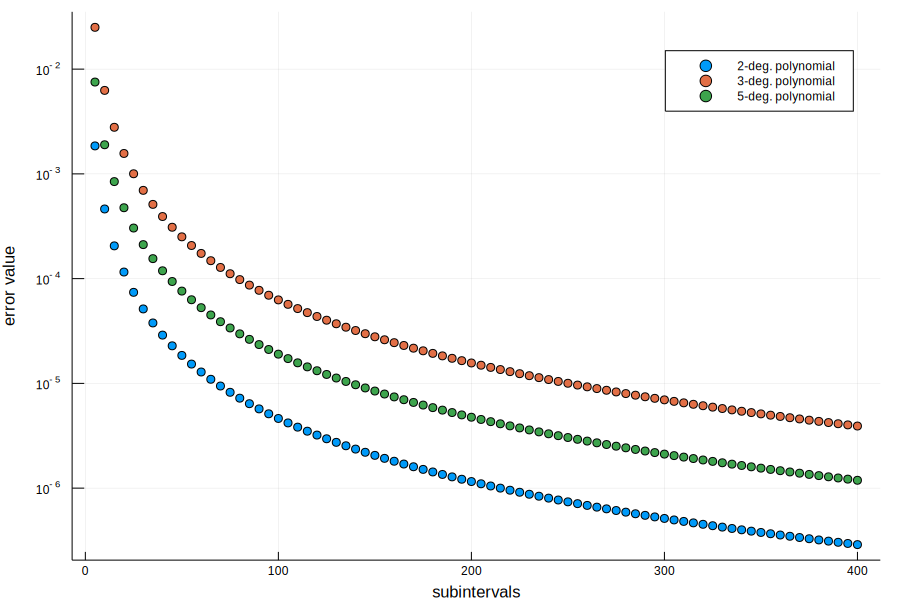

In [8]:
a = -1.0
b = 1.0
n = 5:5:400
p2 = Poly([rand(),rand(),rand()]); p3 = Poly([rand(),rand(),rand(),rand()]); p5 = Poly([rand(),rand(),rand(),rand(),rand(),rand()])
errs2 = [abs(polyint(p2, -1.0, 1.0) - midpoint(p2, -1.0, 1.0, x)) for x in n]
errs3 = [abs(polyint(p3, -1.0, 1.0) - midpoint(p3, -1.0, 1.0, x)) for x in n]
errs5 = [abs(polyint(p5, -1.0, 1.0) - midpoint(p5, -1.0, 1.0, x)) for x in n]
scatter(n, errs2, label="2-deg. polynomial",
    yscale=:log10,
    xlabel="subintervals",
    ylabel="error value",
    size=(900,600))
scatter!(n, errs3, label="3-deg. polynomial")
scatter!(n, errs5, label="5-deg. polynomial")